## Laboratorio 4: Problema Lineal Cuadrático

### Integrantes: Isidora Reyes y Maximiliano S. Lioi

Consideramos una partícula en el espacio, la cuál está sometida a las fuerzas dadas por $F_x = x + u$ y $F_y = y + v$,
donde $u$ y $v$ son los controles del sistema. Además de lo anterior, la velocidad del eje z depende de la posición en
los ejes x e y de la forma x + y. El sistema queda entonces descrito por la ecuación diferencial:

$$\ddot{x} = x+v ; \ddot{y} = y+v ; \dot{z} = x+y$$

La partícula tiene masa unitaria, y en el instante inicial, se encuentra en
reposo en la posición $(1, 1, 0)$.

Luego el sistema controlado se representa de forma matricial considerando

$$X(t) = \begin{bmatrix} 
x(t) \\
\dot{x}(t) \\
y(t) \\
\dot{y}(t) \\
z(t)
\end{bmatrix}$$

$$\dot{X}(t) = 
\begin{bmatrix}
\dot{x}(t) \\
x(t)+u(t) \\
\dot{y}(t) \\
y(t) +v(t) \\
x(t)+y(t)
\end{bmatrix} = \begin{bmatrix}
0 & 1 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 \\
0 & 0 & 1 & 0 & 0 \\
1 & 0 & 1 & 0 & 0
\end{bmatrix} X(t) + \begin{bmatrix}
0 & 0 \\
1 & 0 \\
0 & 0 \\
0 & 1 \\
0 & 0 \\
\end{bmatrix} \begin{bmatrix}
u(t) \\
v(t)
\end{bmatrix}
$$

De ahora en adelante, consideraremos $t_f=5$ controles irrestrictos.
El problema presentado ahora, consiste en minimizar la fuerza total ejercida, en conjunto con la energía cinética al final del tramo, en particular, se debe minimizar el funcional:
$$
J(u(\cdot), v(\cdot)):=K\left(t_f\right)+\int_0^{t_f}\|(u(t), v(t))\|^2 d t,
$$
donde $K(t):=\frac{1}{2} m(t) \mathrm{V}(t)^2$ es la energía cinética, $m(t)$ es la masa y $\mathrm{v}(t)$ es la velocidad.

**Nota**: Asegurarse de correr el código desde cero, pues hay algunas variables que se reutilizan y puede dar problemas si se van corriendo distintas partes del código en el orden que no es previsto.

### Ejercicio 1
Modelamos el nuevo problema como un problema lineal cuadrático, identificando las matrices $Q(\cdot), W(\cdot)$, $U(\cdot)$ 

Queremos minimizar el funcional 

$$J(u(\cdot),v(\cdot)) = \frac{m(t_f) V(t_f)^2}{2} + \int_0^{t_f}\|(u(t), v(t))\|^2 d t $$

Para ello, buscamos escribir el funcional de la forma

$$J(u(\cdot)) = X(t_f)^{T} Q X(t_f) + \int_{0}^{t_f}  X(t)^{T} W(t) X(t) + u(t)^{T} U(t) u(t) dt$$

Tenemos masa unitaria y suponemos que la masa no varía a lo largo del tiempo, luego $$m(t_f) = 1$$, además, podemos expresar la velocidad de la partícula como 

$$V(t)^2 = \dot{x}^{2}(t) + \dot{y}^{2}(t) + \dot{z}^{2}(t)$$

La dinámica del sistema nos dice que $\dot{z} = x + y$, luego $\dot{z}^2(t) = x^2(t) + 2x(t_f)y(t_f) + y^2(t)$

Por lo que buscamos minimizar 

$$J(u(\cdot),v(\cdot)) = \frac{1}{2} ( \dot{x}(t_f)^2 + \dot{y}(t_f)^2 + x^2(t_f) + 2x(t_f)y(t_f) + y^2(t_f)) + \int_0^{t_f} u(t)^2 + v(t)^2 dt $$

Tenemos para una matriz $Q$ que la forma cuadrática

$$x^T Q x = \sum_{i=1}^{n} \sum_{j=1}^{n} x_i Q_{ij} x_j$$

Por lo que necesitamos que $$Q_{22}= 1, Q_{44} = 1, Q_{11} = 1, Q_{33} = 1, Q_{13} = 1, Q_{31} = 1 $$

Para obtener $\dot{x}(t_f)^2 + \dot{y}(t_f)^2 + x^2(t_f) + 2x(t_f)y(t_f) + y^2(t_f)$, luego la matriz $Q$ debe ser

$$Q =\frac{1}{2} \begin{bmatrix}
1 & 0 & 1 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 \\
1 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0
\end{bmatrix}$$

Por lo demás, los valores propios de $Q$ son 

$$\lambda_1 = 0, \lambda_2 = 0, \lambda_3 = 1, \lambda_4 = 1/2, \lambda_5 = 1/2$$

Y por lo tanto $Q \in S_{+}^{n}$, por lo demás, tomamos $W(t) = 0_n \in S_{+}^{n}$ y $U(t) = I_n \in S_{++}^{n}$, de donde concluimos que se cumplen las hipótesis que asumimos en cátedra

### Ejercicio 2
Usando el Principio del Máximo de Pontryagin deseamos probar que el control óptimo esta dado por $\left(u^*(t), v^*(t)\right)=$ $\left(p_2(t), p_4(t)\right)$, con $p(\cdot)$ solución de:
$$
\dot{p}(t)=-\left(\begin{array}{cccc}
0 & 1 & 0 & 0 \\
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{array}\right) p(t) ; \quad p\left(t_f\right)=-\frac{1}{2}\left(\begin{array}{c}
x\left(t_f\right)+y\left(t_f\right) \\
\dot{x}\left(t_f\right) \\
x\left(t_f\right)+y\left(t_f\right) \\
\dot{y}\left(t_f\right)
\end{array}\right)
$$

Tenemos del principio del máximo de Pontryagin para el Problema Lineal Cuadrático que existe una función absolutamente continua $p(\cdot)$ tal que

$$\dot{p}(t) = -A(t)^{T} + W(t)x(t) ; p(t_f) = -Qx(t_f) $$

Para $x(t)$ la trayectoria óptima asociada al problema, luego tomando los datos del problema tenemos el sistema

$$\dot{p}(t) = - \begin{bmatrix}
0 & 1 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 \\
0 & 0 & 1 & 0 & 0 \\
1 & 0 & 1 & 0 & 0
\end{bmatrix}^{T} p(t)$$

Equivalentemente

$$ \dot{p}(t) = - \begin{bmatrix}
0 & 1 & 0 & 0 & 1 \\
1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 1 \\
0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 
\end{bmatrix} p(t) = 
- \begin{bmatrix}
p_2(t) + p_5(t) \\
p_1(t)  \\
p_4(t) + p_5(t) \\
p_3(t) \\
0
\end{bmatrix}$$

Con condición de borde 

$$p(t_f) = -Q X(t_f) = -\frac{1}{2} \begin{bmatrix}
1 & 0 & 1 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 \\
1 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0
\end{bmatrix} X(t_f)= - \frac{1}{2} \begin{bmatrix}
x(t_f) + y(t_f) \\
\dot{x}(t_f) \\
x(t_f) + y(t_f) \\
\dot{y}(t_f) \\
0
\end{bmatrix}$$ 
De esto último, deducimos que $p_5(t) = cte$, además, sabemos que $p_5(t_f) = 0$, por lo tanto, $p_5(t) = 0 \forall t \in [0,t_f]$, de donde obtenemos el sistema equivalente

$$\begin{bmatrix} 
\dot{p}_1(t) \\
\dot{p}_2(t) \\
\dot{p}_3(t) \\
\dot{p}_4(t)
\end{bmatrix} = -\begin{bmatrix}
p_2(t) \\
p_1(t) \\
p_4(t) \\
p_3(t) \\
\end{bmatrix} = -\begin{bmatrix}
0 & 1 & 0 & 0  \\
1 & 0 & 0 & 0  \\
0 & 0 & 0 & 1  \\
0 & 0 & 1 & 0 
\end{bmatrix} p(t)$$

Junto a las condición de borde 

$$p(t_f) = -\frac{1}{2} \begin{bmatrix}
x(t_f) + y(t_f) \\
\dot{x}(t_f) \\
x(t_f) + y(t_f) \\
\dot{y}(t_f)
\end{bmatrix}$$

El control óptimo toma la expresión, recordando que $p_5(t) = 0$

$$u(t) = U(t)^{-1} B(t)^{T} p(t) = I \begin{bmatrix} 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0\end{bmatrix} p(t)$$

De donde obtenemos que el control óptimo viene dado por 

$$\begin{bmatrix}
u(t) \\
v(t)
\end{bmatrix} = \begin{bmatrix}
p_2(t) \\
p_4(t)
\end{bmatrix}$$

### Ejercicio 3

Utilizando el resultado de la pregunta anterior, junto a scipy.integrate.solve.ivp y nuevamente scipy.optimize.minimize, con tal de encontrar un control óptimo para el problema lineal cuadrático. Grafique su trayectoria, control, y la evolución de su función de optimización.

*Indicación*: Cree una función que tome, como variables, las condiciones iniciales de $p$, resuelva el sistema acoplado hasta el tiempo final y entregue el error entre el estado final de $p$ conseguido y el esperado según el ejercicio anterior. Luego, minimice dicha función.

Considerando que el control óptimo se escribe

$$\begin{bmatrix}
u(t) \\
v(t)
\end{bmatrix} = \begin{bmatrix}
p_2(t) \\
p_4(t)
\end{bmatrix}$$

Definimos el sistema acoplado

$$\dot{\Phi}(t) = \begin{bmatrix}
\dot{X} \\
\dot{p}
\end{bmatrix} = \begin{bmatrix}
\dot{x}(t) \\
x(t)+p_2(t) \\
\dot{y}(t) \\
y(t) + p_4(t) \\
x(t)+y(t) \\
-p_2(t) \\
-p_1(t) \\
-p_4(t) \\
-p_3(t) 
\end{bmatrix} = A \Phi(t)$$

Donde A viene dado por
$$ A =
\begin{bmatrix}
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 1 \\
1 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 \\
\end{bmatrix}
$$

Con condición de término 

$$\Phi(t_f) = \begin{bmatrix}
X(t_f) \\
p(t_f)
\end{bmatrix}$$

Notamos que no conocemos a priori $p(0)$ ni $X(t_f)$, luego para resolver la ecuación diferencial mediante *Scipy* con el método *solve-ivp* necesitamos encontrar condiciones iniciales $p(0)$ de manera que para la solución con condición inicial

$$\Phi(t_f) = \begin{bmatrix}
X(0) \\
p(0)
\end{bmatrix}$$

Cumpla la condición de término $p(t_f) = -QX(t_f)$ para la solución de la ecuación en $p(\cdot)$. Para ello definimos un problema de optimización que consiste en recibir una tupla $(p_1(0), p_2(0), p_3(0), p_4(0))$, resolver la ecuación diferencial para $\Phi(\cdot)$ en el intervalo $[0,t_f]$ y minimizar la cantidad 
$$||\Phi(t_f) - \begin{bmatrix} 
X(t_f) \\
-\frac{1}{2} x(t_f) -\frac{1}{2} y(t_f)\\
-\frac{1}{2} \dot{x}(t_f) \\
-\frac{1}{2} x(t_f) -\frac{1}{2} y(t_f) \\
-\frac{1}{2} \dot{y}(t_f) \\
\end{bmatrix}||_2$$

Equivalentemente, considerando $p(0) \in \mathbb{R}^4$ y $\Phi(t) = \begin{bmatrix} 
X(t) \\
p(t) \end{bmatrix}$ 
solución de la ecuación $\dot{\Phi}(t) = A \Phi(t)$ con condiciones iniciales $\Phi(0) = \begin{bmatrix} 
X(0) \\
p(0)
\end{bmatrix}$, definimos el problema de optimización

$$\min_{p(0) \in \mathbb{R}^4}||p(t_f) - \begin{bmatrix} 
-\frac{1}{2} x(t_f) -\frac{1}{2} y(t_f)\\
-\frac{1}{2} \dot{x}(t_f) \\
-\frac{1}{2} x(t_f) -\frac{1}{2} y(t_f) \\
-\frac{1}{2} \dot{y}(t_f) \\
\end{bmatrix}||_2$$

$$\text{sujeto a} \ \ \dot{\Phi}(t) = A \Phi(t), \ \ \Phi(0) = \begin{bmatrix} 
X(0) \\
p(0)
\end{bmatrix}$$

De esta manera encontramos el valor de $p(0)$ que hace factible las ecuaciones del principio del máximo de Pontryagin, pues como la EDO es lineal, pasa una única curva integral por $t=0$ y $t = 5$

**Nota**: 

$$p(t_f) =  -\frac{1}{2} \begin{bmatrix}
1 & 0 & 1 & 0  \\
0 & 1 & 0 & 0  \\
1 & 0 & 1 & 0  \\
0 & 0 & 0 & 1  
\end{bmatrix} \begin{bmatrix} 
x(t) \\
\dot{x}(t) \\
y(t) \\
\dot{y}(t) 
\end{bmatrix} = - \frac{1}{2} \begin{bmatrix}
x(t_f) + y(t_f) \\
\dot{x}(t_f) \\
x(t_f) + y(t_f) \\
\dot{y}(t_f) 
\end{bmatrix}$$

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

# Definimos las matrices asociadas al sistema acoplado e inicialización
t_f = 5
t_span = (0, t_f)

A=np.array([[0,1,0,0,0,0,0,0,0],
            [1,0,0,0,0,0,1,0,0],
           [0,0,0,1,0,0,0,0,0],
           [0,0,1,0,0,0,0,0,1],
           [1,0,1,0,0,0,0,0,0],
           [0,0,0,0,0,0,-1,0,0],
           [0,0,0,0,0,-1,0,0,0],
           [0,0,0,0,0,0,0,0,-1],
           [0,0,0,0,0,0,0,-1,0]])

Q = -0.5 * np.array([[1, 0, 1, 0],
                    [0, 1, 0, 0],
                    [1, 0, 1, 0],
                    [0, 0, 0, 1]])

# Definimos la dinámica del sistema acoplado
def PhiDynamics(t,phi):
    return np.dot(A, phi)

# Definimos función toma, como variables las condiciones iniciales de p y devuelve la condición inicial para Phi
def Phi0(p_0):
    X_0 = np.array([1, 0, 1, 0, 0])
    Phi_0 = np.concatenate((X_0,p_0))
    return Phi_0

# Definimos problema de optimización

def objective_function(p_0):
    #Condiciones iniciales
    Phi_0 = Phi0(p_0)
    
    #Resolver la EDO y devolver Phi(t_f)
    Phi_tf = solve_ivp(PhiDynamics, t_span, Phi_0, t_eval=[t_f], method='RK45') #Phi(t_f)
    p_tf = Phi_tf.y[-4:] #p(t_f)
    X_tf = Phi_tf.y[:4] #(x, dx, y, dy)
    QX_tf = np.dot(Q, X_tf) #Q x_tf
    
    # Minimización
    error = np.linalg.norm(p_tf - QX_tf)
    return error

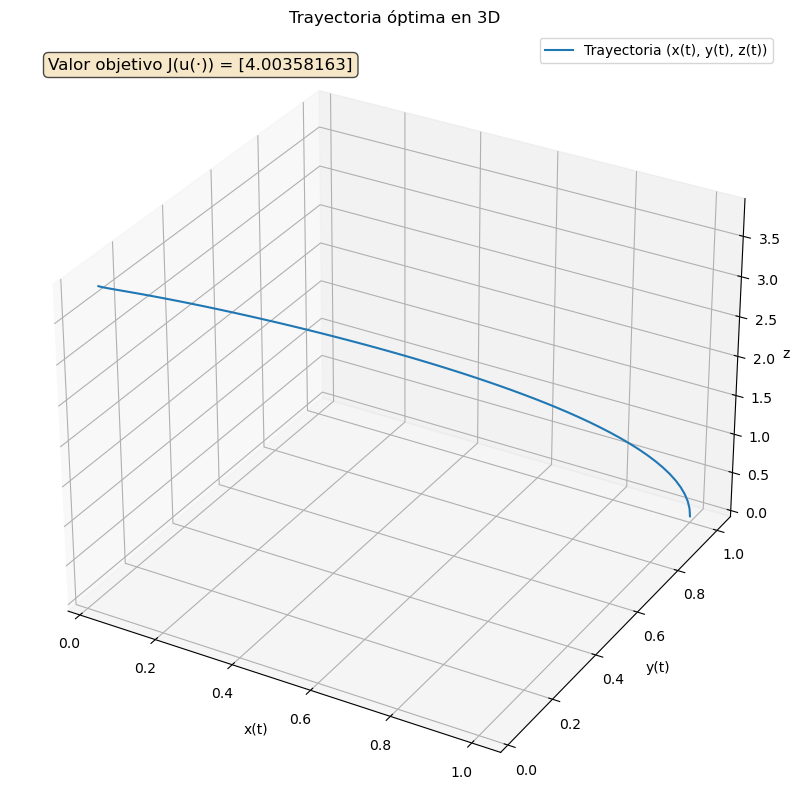

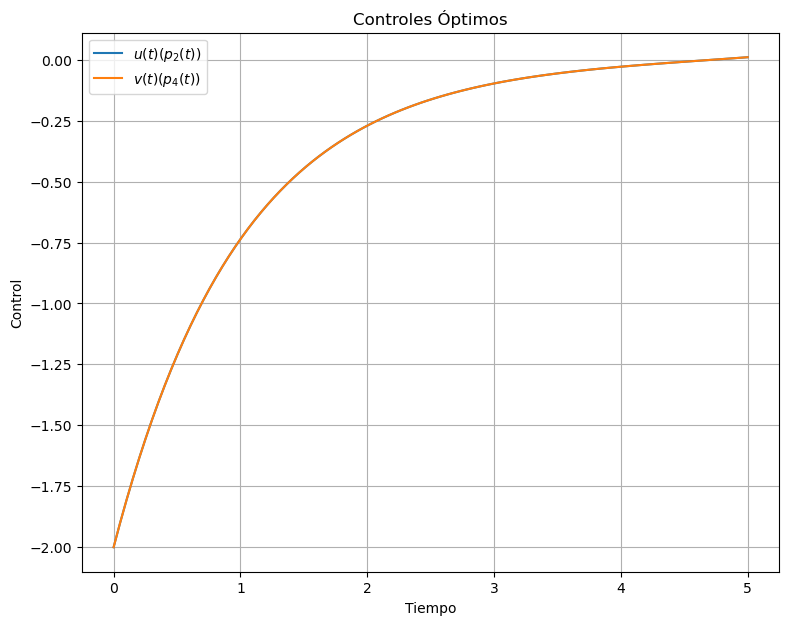

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy import integrate
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Iteración inicial para p(0)
p0_initial_guess = np.array([1,2,0,4])

# Resolver el problema de optimización
result = minimize(objective_function, p0_initial_guess)
p0_optimal = result.x

# Función para resolver el sistema acoplado
def solve_coupled_system(p_0):
    # Condiciones iniciales
    Phi_0 = Phi0(p_0)
    
    # Resolver la EDO
    Phi_solution = solve_ivp(PhiDynamics, t_span, Phi_0, t_eval=np.linspace(0, t_f, 100), method='RK45')
    Phi_solution_tf = solve_ivp(PhiDynamics, t_span, Phi_0, t_eval=[t_f], method='RK45')
    # Obtener resultados
    t = Phi_solution.t
    X_solution = Phi_solution.y[:5]
    X_solution_tf = Phi_solution_tf.y[:5]
    # Calcular los controles óptimos (u(t), v(t)) = (p_2(t), p_4(t))
    u_optimal = Phi_solution.y[6]
    v_optimal = Phi_solution.y[8]
    
    objetive_value = 0.5*(X_solution_tf[0]**2 + X_solution_tf[1]**2 + X_solution_tf[2]**2 + X_solution_tf[3]**2 + 2*X_solution_tf[0]*X_solution_tf[2]) + integrate.simpson(u_optimal**2 + v_optimal**2, t)
    return t, X_solution, u_optimal, v_optimal, objetive_value

# Resolver el sistema acoplado con p_0 óptimo
t, X_solution, u_optimal, v_optimal, objetive_value = solve_coupled_system(p0_optimal)

# Graficar la trayectoria en 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

x = X_solution[0]
y = X_solution[2]
z = X_solution[4]  # Usamos la componente z de X_solution

ax.plot(x, y, z, label='Trayectoria (x(t), y(t), z(t))')
ax.set_xlabel('x(t)')
ax.set_ylabel('y(t)')
ax.set_zlabel('z(t)')
ax.set_title('Trayectoria óptima en 3D')

# Agregar etiqueta con el valor objetivo
ax.text2D(0.05, 0.95, f'Valor objetivo J(u(·)) = {objetive_value}', transform=ax.transAxes,
          fontsize=12, bbox=dict(boxstyle='round', facecolor='wheat', edgecolor='black', alpha=0.7))
ax.legend()

# Graficar los controles óptimos (u(t), v(t))
fig = plt.figure(figsize=(9, 7))
plt.plot(t, u_optimal, label=r'$u(t) (p_2(t))$')
plt.plot(t, v_optimal, label=r'$v(t) (p_4(t))$')
plt.xlabel('Tiempo')
plt.ylabel('Control')
plt.title('Controles Óptimos')
plt.legend()
plt.grid(True)

plt.show()

### Ejercicio 4 

Establecemos la ecuación de Riccati del problema y resuélvala numéricamente. A partir de esto, escriba y simule numéricamente el control óptimo del problema LC en forma de feedback. Compare con la solución obtenida en la pregunta anterior (grafique, estime error, etc.).

Sabemos que $u(\cdot)$ se puede escribir en forma de feedback lineal, pues se cumple la condición de existencia y unicidad trivialmente al ser $U = I$.

El único control óptimo de nuestro problema (PLC) se puede expresar como el feedback lineal
$$
u(t)=U^{-1}(t) B(t)^{\top} E(t) X(t) \text { c.t.p. } t \in[0, t_f]
$$
donde $E(\cdot)$ es la solución sobre $[0, t_f]$ de la ecuación matricial de Riccati:
$$
\left\{\begin{array}{l}
\dot{E}(t)=W(t)-A(t)^{\top} E(t)-E(t)^{\top} A(t)-E(t)^{\top} B(t) U^{-1}(t) B(t)^{\top} E(t) \\
E(t_f)=-Q
\end{array}\right.
$$
Más aún, $E(\cdot)$ es a valores simétricos y la función valor del problema cumple
$$
\operatorname{val}(\mathrm{PLC})=-x_0^{\top} E(0) x_0
$$

Identificando términos de nuestro problema tenemos 
$$Q =\frac{1}{2} \begin{bmatrix}
1 & 0 & 1 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 \\
1 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0
\end{bmatrix} \ ; \ U = \begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}\ ; \ W = 0_{5}$$

Junto a
$$
A = \begin{bmatrix}
0 & 1 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 \\
0 & 0 & 1 & 0 & 0 \\
1 & 0 & 1 & 0 & 0
\end{bmatrix} \ ; \ B = \begin{bmatrix}
0 & 0 \\
1 & 0 \\
0 & 0 \\
0 & 1 \\
0 & 0 \\
\end{bmatrix}
$$

Y entonces la ecuación de Riccati asociada al control óptimo

$$
u(t)=B(t)^{\top} E(t) X(t) \text { c.t.p. } t \in[0, t_f]
$$

Se formula como

$$
\left\{\begin{array}{l}
\dot{E}(t)=-A^{\top} E(t)-E(t)^{\top}A -E(t)^{\top} B  B^{\top} E(t) \\
E(t_f)=-Q
\end{array}\right.
$$

Para ello resolvemos el sistema inverso que sigue $\hat{E}(t) = E(t_f - t) \implies \dot{\hat{E}}(t) = - \dot{E}(t_f-t) = - \hat{E}(t)$, con el fin de resolver usando *solve_ivp* con condición inicial $\hat{E}(0) = -Q$.

Se tiene la dinámica

$$
\left\{\begin{array}{l}
\dot{\hat{E}}(t)=A^{\top} \hat{E}(t)+\hat{E}(t)^{\top}A +\hat{E}(t)^{\top} B  B^{\top} \hat{E}(t) \\
\hat{E}(0)=-Q
\end{array}\right.
$$

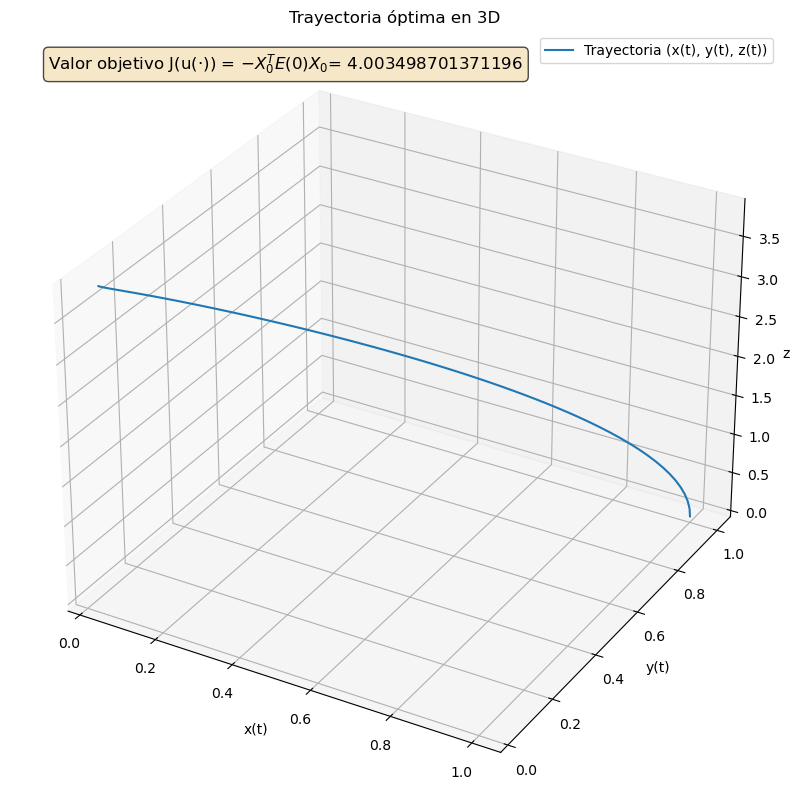

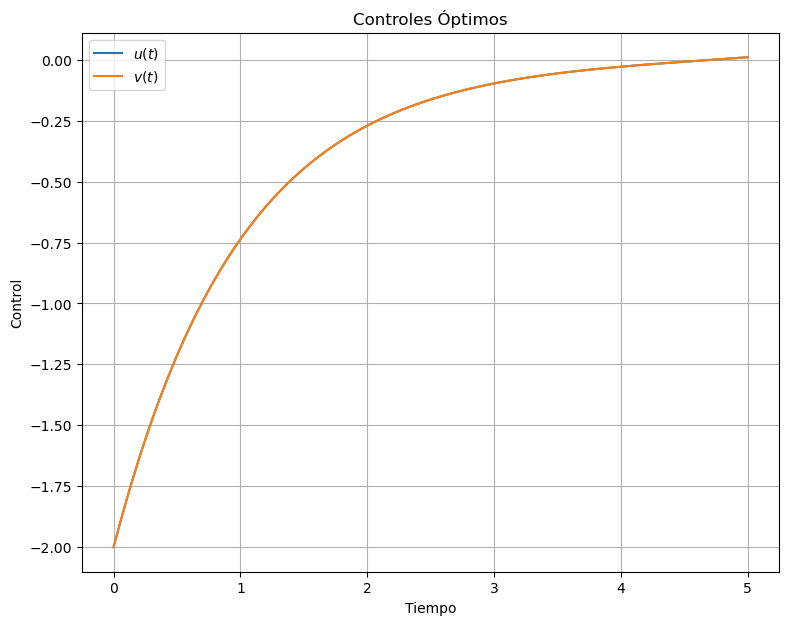

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

# Inicialización
t_f = 5
t_span = (0, t_f)

# Definir las matrices Q, A y B según la indicación
Q = -0.5 * np.array([[1, 0, 1, 0, 0],
                    [0, 1, 0, 0, 0],
                    [1, 0, 1, 0, 0],
                    [0, 0, 0, 1, 0],
                    [0, 0, 0, 0, 0]])

Q_ravel = Q.ravel()

A = np.array([[0, 1, 0, 0, 0],
              [1, 0, 0, 0, 0],
              [0, 0, 0, 1, 0],
              [0, 0, 1, 0, 0],
              [1, 0, 1, 0, 0]])

B = np.array([[0, 0],
              [1, 0],
              [0, 0],
              [0, 1],
              [0, 0]])

X_0 = np.array([1,0,1,0,0])

# Función de dinámica de Riccati inversa
def RiccatiDynamics(t, E):
    # Reformar la matriz de 5x5
    E_matrix = np.array(E).reshape(5, 5)  
    # Dinámica
    dynamics = np.dot(A.T, E_matrix) + np.dot(E_matrix.T, A) + np.dot(E_matrix, np.dot(np.dot(B,B.T),E_matrix))
    return dynamics.ravel() # Aplanar la matriz resultante

# Función hat_E(t) solución de la ecuación de Riccati inversa con dense_output, se usará para definir el control feedback.
hat_E = solve_ivp(RiccatiDynamics, t_span, Q_ravel, method='RK45', t_eval = np.linspace(0,t_f,100), dense_output = True).sol

# Funcion E(t) solución de la ecuación de Riccati inversa como función lambda
def E_matrix(t):
    E_matrix = hat_E(t_f-t).reshape(5,5)
    return E_matrix

# Definimos la dinámica del sistema controlado por feedback lineal
def DynamicsRFeedback(t, X):
    return np.dot(A,X) + np.dot(B,np.dot(B.T, np.dot(E_matrix(t), X)))

# Entregamos la solución del sistema
X_solution_feedback = solve_ivp(DynamicsRFeedback, t_span, X_0, method='RK45', t_eval = np.linspace(0,t_f,100))
objetive_value_feedback = -np.dot(X_0, np.dot(E_matrix(0),X_0)) #-X_0^T E(0) X_0

# Graficar la trayectoria en 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

x_feedback = X_solution_feedback.y[0]
y_feedback = X_solution_feedback.y[2]
z_feedback = X_solution_feedback.y[4]  # Usamos la componente z de X_solution

ax.plot(x_feedback, y_feedback, z_feedback, label='Trayectoria (x(t), y(t), z(t))')
ax.set_xlabel('x(t)')
ax.set_ylabel('y(t)')
ax.set_zlabel('z(t)')
ax.set_title('Trayectoria óptima en 3D')

# Agregar etiqueta con el valor objetivo
ax.text2D(0.05, 0.95, f'Valor objetivo J(u(·)) = $-X_0^T E(0) X_0$= {objetive_value_feedback}', transform=ax.transAxes,
          fontsize=12, bbox=dict(boxstyle='round', facecolor='wheat', edgecolor='black', alpha=0.7))
ax.legend()

# Calcular el control óptimo u(t) y v(t) en cada punto de tiempo a partir de la solución X(t)
u_feedback = np.zeros_like(X_solution_feedback.t)
v_feedback = np.zeros_like(X_solution_feedback.t)

for i, t in enumerate(X_solution_feedback.t):
    E_t = E_matrix(t)
    X_t = X_solution_feedback.y[:, i]
    u_feedback[i] = np.dot(B.T, np.dot(E_t, X_t))[0]  # Componente u(t)
    v_feedback[i] = np.dot(B.T, np.dot(E_t, X_t))[1]  # Componente v(t)

# Graficar los controles óptimos (u(t), v(t))
fig = plt.figure(figsize=(9, 7))
t = X_solution_feedback.t
plt.plot(t, u_feedback, label=r'$u(t)$')
plt.plot(t, v_feedback, label=r'$v(t)$')
plt.xlabel('Tiempo')
plt.ylabel('Control')
plt.title('Controles Óptimos')
plt.legend()
plt.grid(True)

plt.show()

**Comparativas**: Notamos a simple vista que ambas soluciones son casi identicas, para la solución encontrada mediante el principio del máximo de Pontryagin, se alcanza un valor objetivo de $J(u(\cdot)) = 4.003579$ que es ligeramente mayor al valor objetivo alcanzado mediante un control de tipo feedback obtenido de la ecuación de Riccati que alcanza un valor objetivo $J(u(\cdot)) = -X_0^{T} E(0)X_0 = 4.0034987$. 

Con el fin de estimar la diferencia de las soluciones, computamos sus diferencias en la norma de $L^2([0,t_f], \mathbb{R}^3)$ para el caso de las trayectorias $(x(t),y(t),z(t))$, y en la norma de $L^{2}([0,t_f], \mathbb{R}^2)$ para los controles $(u(t),y(t))$ que son irrestrictos 

Denotamos las soluciones asociadas al principio del máximo de Pontryagin por (PMP), y a las soluciones asociadas a la ecuación de Riccati de tipo feedback lineal por (FL), se calculan las cantidades

$$||X_{PMP}(t) - X_{FL}||_L2 = \sqrt{\int_{0}^{t_f} (x_{PMP}(t) - x_{FL}(t))^2 + (y_{PMP}(t) - y_{FL}(t))^2 + (z_{PMP}(t) - z_{FL}(t))^2 dt}$$
$$||u_{PMP}(t) - u_{FL}||_L2 = \sqrt{\int_{0}^{t_f} (u_{PMP}(t) - u_{FL}(t))^2 + (v_{PMP}(t) - v_{FL}(t))^2 dt}$$

In [4]:
# Calculamos error L2 de las trayectorias
error_trayectorias_L2 = np.sqrt(integrate.simpson((x - x_feedback)**2 + (y - y_feedback)**2 + (z - z_feedback)**2, t))
print(r'El error L2 de las trayectorias obtenidas ||X_{PMP}(t) - X_{FL}||_L2', error_trayectorias_L2)

# Calculamos error L2 de los controles
error_control_L2 = np.sqrt(integrate.simpson((u_optimal - u_feedback)**2 + (v_optimal - v_feedback)**2, t))
print(r'El error L2 de los controles obtenidos ||u_{PMP}(t) - u_{FL}||_L2', error_control_L2)

El error L2 de las trayectorias obtenidas ||X_{PMP}(t) - X_{FL}||_L2 0.00021522968559413864
El error L2 de los controles obtenidos ||u_{PMP}(t) - u_{FL}||_L2 0.00010383960936698143


### Ejercicio 5

Exportamos los datos de BOCOP en Python a partir de los archivos .export

**Error de las Trayectorias**

In [5]:
# Importe de la trayectoria óptima desde BOCOP

# Solución en x

x_bocop = [
    1, 0.998765, 0.995222, 0.989603, 0.982118, 0.972967, 0.962331, 0.950378, 0.937263, 0.923131,
    0.908112, 0.892329, 0.875892, 0.858905, 0.841461, 0.823646, 0.805539, 0.787211, 0.768728, 0.75015,
    0.73153, 0.712918, 0.694357, 0.675888, 0.657546, 0.639363, 0.621368, 0.603585, 0.586038, 0.568747,
    0.551727, 0.534995, 0.518562, 0.50244, 0.486637, 0.471161, 0.456017, 0.441211, 0.426745, 0.412621,
    0.398840, 0.385403, 0.372308, 0.359554, 0.347140, 0.335061, 0.323315, 0.311898, 0.300806, 0.290034,
    0.279577, 0.269430, 0.259587, 0.250043, 0.240792, 0.231827, 0.223144, 0.214735, 0.206595, 0.198716,
    0.191094, 0.183722, 0.176593, 0.169701, 0.163041, 0.156606, 0.150391, 0.144389, 0.138594, 0.133002,
    0.127607, 0.122404, 0.117386, 0.112550, 0.107890, 0.103402, 0.0990814, 0.0949233, 0.0909239, 0.0870792,
    0.0833855, 0.0798391, 0.0764368, 0.0731753, 0.0700518, 0.0670636, 0.0642082, 0.0614834, 0.0588872,
    0.0564180, 0.0540742, 0.0518548, 0.0497587, 0.0477855, 0.0459348, 0.0442066, 0.0426014, 0.0411196, 0.0397625,
    0.0385314
]

# Solución en y

y_bocop = [
    1, 0.998765, 0.995222, 0.989603, 0.982118, 0.972967, 0.962331, 0.950378, 0.937263, 0.923131,
    0.908112, 0.892329, 0.875892, 0.858905, 0.841461, 0.823646, 0.805539, 0.787211, 0.768728, 0.75015,
    0.73153, 0.712918, 0.694357, 0.675888, 0.657546, 0.639363, 0.621368, 0.603585, 0.586038, 0.568747,
    0.551727, 0.534995, 0.518562, 0.50244, 0.486637, 0.471161, 0.456017, 0.441211, 0.426745, 0.412621,
    0.398840, 0.385403, 0.372308, 0.359554, 0.347140, 0.335061, 0.323315, 0.311898, 0.300806, 0.290034,
    0.279577, 0.269430, 0.259587, 0.250043, 0.240792, 0.231827, 0.223144, 0.214735, 0.206595, 0.198716,
    0.191094, 0.183722, 0.176593, 0.169701, 0.163041, 0.156606, 0.150391, 0.144389, 0.138594, 0.133002,
    0.127607, 0.122404, 0.117386, 0.112550, 0.107890, 0.103402, 0.0990814, 0.0949233, 0.0909239, 0.0870792,
    0.0833855, 0.0798391, 0.0764368, 0.0731753, 0.0700518, 0.0670636, 0.0642082, 0.0614834, 0.0588872,
    0.0564180, 0.0540742, 0.0518548, 0.0497587, 0.0477855, 0.0459348, 0.0442066, 0.0426014, 0.0411196, 0.0397625,
    0.0385314
]

# Solución en z

z_bocop = [
    0, 0.100968, 0.201693, 0.301953, 0.40155, 0.500305, 0.598059, 0.694671, 0.790015, 0.883983,
    0.976477, 1.06741, 1.15672, 1.24434, 1.33022, 1.41432, 1.49661, 1.57705, 1.65563, 1.73235,
    1.80718, 1.88013, 1.9512, 2.02041, 2.08775, 2.15325, 2.21692, 2.27879, 2.33887, 2.39719,
    2.45377, 2.50866, 2.56186, 2.61343, 2.66338, 2.71175, 2.75857, 2.80388, 2.84772, 2.89011,
    2.93109, 2.97069, 3.00896, 3.04592, 3.08161, 3.11606, 3.14931, 3.18139, 3.21233, 3.24216,
    3.27093, 3.29866, 3.32537, 3.35111, 3.37589, 3.39976, 3.42274, 3.44485, 3.46613, 3.4866,
    3.50628, 3.52521, 3.5434, 3.56089, 3.5777, 3.59384, 3.60934, 3.62423, 3.63852, 3.65223,
    3.66539, 3.67802, 3.69013, 3.70174, 3.71287, 3.72354, 3.73377, 3.74356, 3.75295, 3.76194,
    3.77054, 3.77879, 3.78668, 3.79423, 3.80147, 3.80839, 3.81502, 3.82137, 3.82744, 3.83327,
    3.83885, 3.84419, 3.84933, 3.85425, 3.85898, 3.86353, 3.86792, 3.87214, 3.87623, 3.88018
]

In [6]:
# Calculamos error L2 de las trayectorias de BOCOP con la solución obtenida del máximo de Pontryagin
error_trayectorias_L2_bocop_pmp = np.sqrt(integrate.simpson((x - x_bocop)**2 + (y - y_bocop)**2 + (z - z_bocop)**2, t))
# Calculamos error L2 de las trayectorias de BOCOP con la solución obtenida del control feedback
error_trayectorias_L2_bocop_fl = np.sqrt(integrate.simpson((x_feedback - x_bocop)**2 + (y_feedback - y_bocop)**2 + (z_feedback - z_bocop)**2, t))
print(r'El error L2 de las trayectorias obtenidas ||X_{BOCOP}(t) - X_{PMP}||_L2', error_trayectorias_L2_bocop_pmp)
print(r'El error L2 de las trayectorias obtenidas ||X_{BOCOP}(t) - X_{PL}||_L2', error_trayectorias_L2_bocop_fl)

El error L2 de las trayectorias obtenidas ||X_{BOCOP}(t) - X_{PMP}||_L2 0.00018232789029199464
El error L2 de las trayectorias obtenidas ||X_{BOCOP}(t) - X_{PL}||_L2 0.0001482071755820014


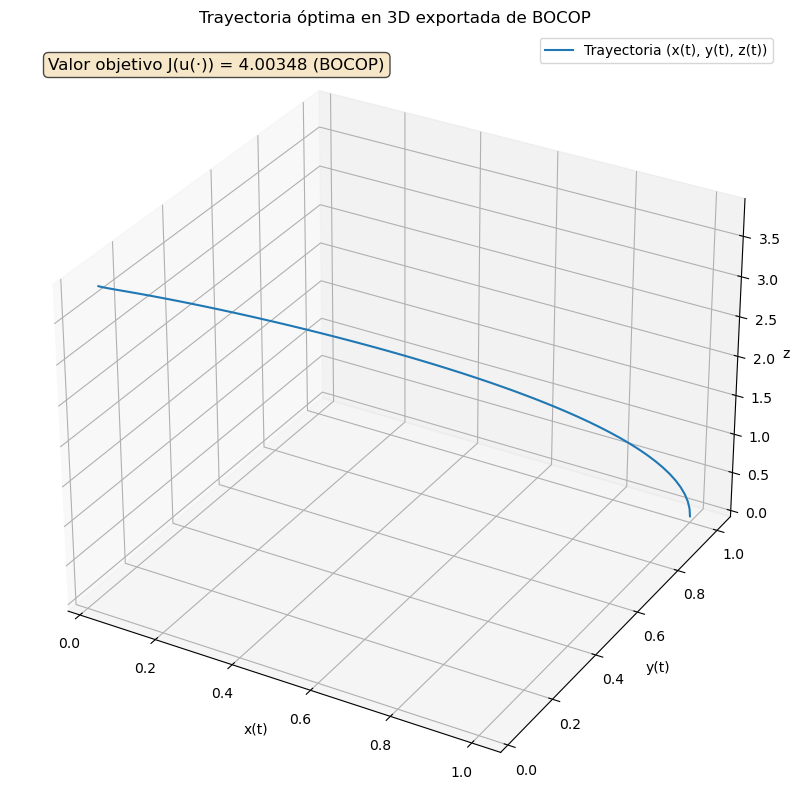

In [7]:
# Graficar la trayectoria en 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot(x_bocop, y_bocop, z_bocop, label='Trayectoria (x(t), y(t), z(t))')
ax.set_xlabel('x(t)')
ax.set_ylabel('y(t)')
ax.set_zlabel('z(t)')
ax.set_title('Trayectoria óptima en 3D exportada de BOCOP')

# Agregar etiqueta con el valor objetivo
ax.text2D(0.05, 0.95, f'Valor objetivo J(u(·)) = 4.00348 (BOCOP)', transform=ax.transAxes,
          fontsize=12, bbox=dict(boxstyle='round', facecolor='wheat', edgecolor='black', alpha=0.7))
ax.legend()

**Error de los controles**

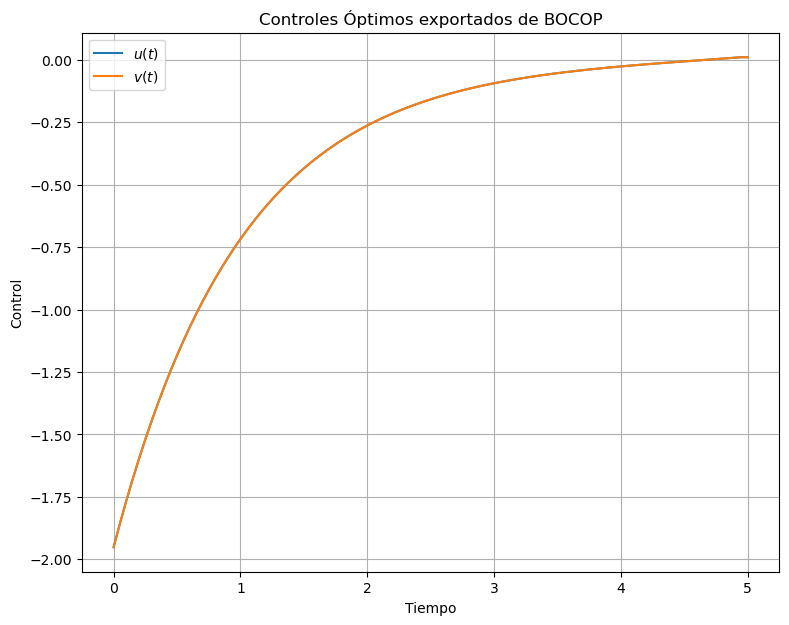

In [8]:
# Exporte de controles óptimos desde BOCOP
u_bocop = [
    -1.95169, -1.85555, -1.76415, -1.67724, -1.59462, -1.51606, -1.44137, -1.37036, -1.30284, -1.23865,
    -1.17762, -1.11959, -1.06442, -1.01196, -0.962088, -0.914669, -0.869583, -0.826716, -0.785958, -0.747206,
    -0.71036, -0.675326, -0.642015, -0.610342, -0.580226, -0.551591, -0.524363, -0.498472, -0.473854, -0.450444,
    -0.428184, -0.407016, -0.386886, -0.367744, -0.349539, -0.332227, -0.315762, -0.300103, -0.285209, -0.271043,
    -0.257568, -0.244751, -0.232558, -0.220959, -0.209923, -0.199422, -0.189431, -0.179923, -0.170874, -0.16226,
    -0.154061, -0.146255, -0.138822, -0.131743, -0.125, -0.118576, -0.112455, -0.106621, -0.101058, -0.0957539,
    -0.0906936, -0.0858647, -0.081255, -0.0768525, -0.0726461, -0.068625, -0.064779, -0.0610983, -0.0575734,
    -0.0541955, -0.0509558, -0.0478461, -0.0448585, -0.0419854, -0.0392193, -0.0365533, -0.0339806, -0.0314946,
    -0.0290889, -0.0267574, -0.0244942, -0.0222935, -0.0201497, -0.0180573, -0.0160109, -0.0140054, -0.0120357,
    -0.0100966, -0.0081833, -0.00629088, -0.0044145, -0.00254939, -0.000690783, 0.00116606, 0.00302588, 0.00489342,
    0.00677345, 0.00867075, 0.0105902, 0.0105902
]

v_bocop = [
    -1.95169, -1.85555, -1.76415, -1.67724, -1.59462, -1.51606, -1.44137, -1.37036, -1.30284, -1.23865,
    -1.17762, -1.11959, -1.06442, -1.01196, -0.962088, -0.914669, -0.869583, -0.826716, -0.785958, -0.747206,
    -0.71036, -0.675326, -0.642015, -0.610342, -0.580226, -0.551591, -0.524363, -0.498472, -0.473854, -0.450444,
    -0.428184, -0.407016, -0.386886, -0.367744, -0.349539, -0.332227, -0.315762, -0.300103, -0.285209, -0.271043,
    -0.257568, -0.244751, -0.232558, -0.220959, -0.209923, -0.199422, -0.189431, -0.179923, -0.170874, -0.16226,
    -0.154061, -0.146255, -0.138822, -0.131743, -0.125, -0.118576, -0.112455, -0.106621, -0.101058, -0.0957539,
    -0.0906936, -0.0858647, -0.081255, -0.0768525, -0.0726461, -0.068625, -0.064779, -0.0610983, -0.0575734,
    -0.0541955, -0.0509558, -0.0478461, -0.0448585, -0.0419854, -0.0392193, -0.0365533, -0.0339806, -0.0314946,
    -0.0290889, -0.0267574, -0.0244942, -0.0222935, -0.0201497, -0.0180573, -0.0160109, -0.0140054, -0.0120357,
    -0.0100966, -0.0081833, -0.00629088, -0.0044145, -0.00254939, -0.000690783, 0.00116606, 0.00302588, 0.00489342,
    0.00677345, 0.00867075, 0.0105902, 0.0105902
]

# Graficar los controles óptimos (u(t), v(t))
fig = plt.figure(figsize=(9, 7))
t = X_solution_feedback.t
plt.plot(t, u_bocop, label=r'$u(t)$')
plt.plot(t, v_bocop, label=r'$v(t)$')
plt.xlabel('Tiempo')
plt.ylabel('Control')
plt.title('Controles Óptimos exportados de BOCOP')
plt.legend()
plt.grid(True)

plt.show()

In [9]:
# Calculamos error L2 de los controles
error_control_L2 = np.sqrt(integrate.simpson((u_bocop - u_optimal)**2 + (v_bocop - v_optimal)**2, t))
error_control_feedback_L2 = np.sqrt(integrate.simpson((u_bocop - u_feedback)**2 + (v_bocop - v_feedback)**2, t))
print(r'El error L2 de los controles obtenidos ||u_{BOCOP}(t) - u_{PMP}||_L2', error_control_L2)
print(r'El error L2 de los controles obtenidos ||u_{BOCOP}(t) - u_{FL}||_L2', error_control_feedback_L2)

El error L2 de los controles obtenidos ||u_{BOCOP}(t) - u_{PMP}||_L2 0.04973597182041772
El error L2 de los controles obtenidos ||u_{BOCOP}(t) - u_{FL}||_L2 0.049740316290612374
